## Analysis of Google Merchandise Store - Product performance (Year)

 - What are customers buying?
 - How does the revenue develop over time?
 - How does the revenue per Alphabet/Google employee change over the years?



**Import libraries**

In [1]:
import pandas as pd # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Matplotlib for drawing plots in Python
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib

**Read *csv**

Downloaded from:

https://analytics.google.com/analytics/web/?utm_source=demoaccount&utm_medium=demoaccount&utm_campaign=demoaccount#/report/conversions-ecommerce-product-performance/a54516992w87479473p92320289/_u.date00=20141001&_u.date01=20200229&_.advseg=&_.useg=&_.sectionId=&explorer-table.secSegmentId=analytics.year&explorer-table.plotKeys=%5B%5D&explorer-table.rowStart=0&explorer-table.rowCount=5000/

In [2]:
df=pd.read_csv('Product Performance 20141001-20200229.csv', skiprows=5, skipfooter=1982, engine='python')

**Show number of lines/columns of data frame**

In [3]:
df.shape

(3153, 10)

**Show head and tail**

In [4]:
df.head(5)

,Product,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,2017,"$684,000.19","3,511","4,570",$149.67,1.30,$0.00,60.89%,33.65%
1,Nest® Cam Outdoor Security Camera - USA,2017,"$626,794.00","3,329","5,206",$120.40,1.56,$0.00,57.27%,26.71%
2,Nest® Cam Indoor Security Camera - USA,2017,"$525,758.00","3,230","4,402",$119.44,1.36,$0.00,47.78%,25.33%
3,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,2016,"$284,739.00","1,478","1,911",$149.00,1.29,$0.00,54.80%,25.07%
4,Nest Hello Doorbell - USA,2018,"$228,886.00","1,232","1,354",$169.04,1.10,$0.00,61.53%,47.49%


In [5]:
df.tail(5)
#to check that all lines are included

,Product,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
3148,YouTube Transmission Journal Black,2020,$0.00,0,0,$0.00,0.0,$0.00,8.65%,0.00%
3149,YouTube Women's 3/4 Sleeve Baseball Raglan Whi...,2017,$0.00,0,0,$0.00,0.0,$0.00,50.00%,0.00%
3150,YouTube Women's Favorite Tee White,2020,$0.00,0,0,$0.00,0.0,$0.00,3.23%,0.00%
3151,YouTube Wordmark Pin,2018,$0.00,0,0,$0.00,0.0,$0.00,2.29%,0.00%
3152,YouTube Wordmark Pin,2019,$0.00,0,0,$0.00,0.0,$0.00,2.17%,0.00%


**Show data types**

In [6]:
df.dtypes

Product                   object
Year                       int64
Product Revenue           object
Unique Purchases          object
Quantity                  object
Avg. Price                object
Avg. QTY                 float64
Product Refund Amount     object
Cart-to-Detail Rate       object
Buy-to-Detail Rate        object
dtype: object

**Cleaning columns/changing data types**

In [7]:
#cleaning columns

df["Year"] = pd.to_datetime(df["Year"], format='%Y')
df["Year"] = df["Year"].dt.year
df['Unique Purchases']=df['Unique Purchases'].str.replace(",","")
df['Quantity']=df['Quantity'].str.replace(",","")
df['Product Revenue']=df['Product Revenue'].str.replace(",","")
df['Product Revenue']=df['Product Revenue'].str.replace("$","")
df['Avg. Price']=df['Avg. Price'].str.replace(",","")
df['Avg. Price']=df['Avg. Price'].str.replace("$","")
df['Product Refund Amount']=df['Product Refund Amount'].str.replace(",","")
df['Product Refund Amount']=df['Product Refund Amount'].str.replace("$","")

#cleaning columns + changing data type
df['Cart-to-Detail Rate'] = df['Cart-to-Detail Rate'].str.replace(",","").str.rstrip('%').astype('float') / 100.0
df['Buy-to-Detail Rate'] = df['Buy-to-Detail Rate'].str.replace(",","").str.rstrip('%').astype('float') / 100.0


In [8]:
#changing types of columns

df["Unique Purchases"] = df["Unique Purchases"].astype(int)
df["Quantity"] = df["Quantity"].astype(int)
df["Product Revenue"] = df["Product Revenue"].astype(float)
df["Avg. Price"] = df["Avg. Price"].astype(float)
df["Product Refund Amount"] = df["Product Refund Amount"].astype(float)

#Ignore:
#df["Avg. Session Duration"] = pd.to_timedelta(df["Avg. Session Duration"])
#df["Avg. Session Duration"] = df["Avg. Session Duration"].apply(lambda x: pd.to_datetime(str(x), format='%H:%M:%S))

In [9]:
#check updated data types

df.dtypes

Product                   object
Year                       int64
Product Revenue          float64
Unique Purchases           int64
Quantity                   int64
Avg. Price               float64
Avg. QTY                 float64
Product Refund Amount    float64
Cart-to-Detail Rate      float64
Buy-to-Detail Rate       float64
dtype: object

**Show updated head of DataFrame**

In [10]:
df.head(10)

,Product,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,2017,684000.19,3511,4570,149.67,1.30,0.0,0.6089,0.3365
1,Nest® Cam Outdoor Security Camera - USA,2017,626794.00,3329,5206,120.40,1.56,0.0,0.5727,0.2671
2,Nest® Cam Indoor Security Camera - USA,2017,525758.00,3230,4402,119.44,1.36,0.0,0.4778,0.2533
3,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,2016,284739.00,1478,1911,149.00,1.29,0.0,0.5480,0.2507
4,Nest Hello Doorbell - USA,2018,228886.00,1232,1354,169.04,1.10,0.0,0.6153,0.4749
5,Nest® Protect Smoke + CO White Battery Alarm-USA,2017,212777.00,1362,2683,79.31,1.97,0.0,0.6403,0.3068
6,Nest® Protect Smoke + CO White Wired Alarm-USA,2017,211500.00,1065,2670,79.21,2.51,0.0,0.6083,0.2686
7,Nest® Learning Thermostat 3rd Gen-USA - White,2017,203932.00,1090,1368,149.07,1.26,0.0,0.5834,0.3128
8,Nest® Cam Outdoor Security Camera - USA,2016,202146.00,1076,1694,119.33,1.57,0.0,0.5407,0.2663
9,Nest® Secure Alarm System Starter Pack - USA,2018,184621.00,521,529,349.00,1.02,0.0,0.3586,0.1717


- top sellers are Nest products, generating the most revenue
- avg. price for those products mostly >100USD

**Compute a summary of statistics pertaining to the numerical DataFrame columns**

In [11]:
df.describe()

,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
count,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.0,3153.000000,3153.000000
mean,2017.027593,3359.577520,49.249286,217.636219,21.292620,2.593482,0.0,0.389268,0.222673
std,1.767641,23587.260876,150.892558,854.359873,33.602288,4.788142,0.0,2.272347,1.995742
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2016.000000,20.000000,1.000000,1.000000,2.950000,1.000000,0.0,0.078900,0.002800
50%,2017.000000,258.300000,10.000000,16.000000,13.000000,1.130000,0.0,0.181000,0.024800
75%,2019.000000,1520.000000,45.000000,94.000000,21.920000,2.100000,0.0,0.332300,0.078300
max,2020.000000,684000.190000,3511.000000,17136.000000,349.000000,100.000000,0.0,64.666700,65.000000


### Plotting values to visualize insights

Show relation between quantity and avg. price

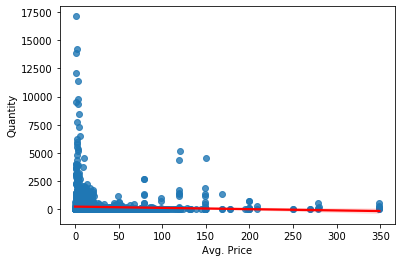

In [12]:
ax = sns.regplot(x="Avg. Price", y="Quantity", line_kws={"color":"r"}, data=df)

- majority of products has a price <50USD
- quantity increases with lower avg. price
- products sold with av.g price >100USD and >2500 times are Nest products

**Grouping numerical values by year**

In [13]:
df_year = df.groupby(['Year']).sum()
df_year = df_year.reset_index() #reset index to make Year a column again
df_year

,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,2014,7122.51,299,968,2651.82,446.88,0.0,5.5485,8.2253
1,2015,552179.79,16829,71329,9586.96,1422.11,0.0,67.9387,16.1201
2,2016,2251127.71,45260,230228,19404.33,2662.11,0.0,437.9952,232.8566
3,2017,4744060.67,54178,252572,12332.90,1984.09,0.0,456.1404,302.7174
4,2018,2966794.40,35514,125192,12441.87,846.52,0.0,122.6806,78.7019
5,2019,63334.49,2824,5168,7293.16,559.49,0.0,97.5609,58.9965
6,2020,8128.35,379,750,3424.59,256.05,0.0,39.4982,4.4700


- highest revenue in 2017, followed by 2018 and 2016
- huge drop of revenue in 2019
- numbers of 2014 very low as only data from October 2014 available

**Add number of employees of Alphabet (parent company of Google) to dataframe**

Taken from: 

https://www.statista.com/statistics/273744/number-of-full-time-google-employees/

In [14]:
#drop numbers of 2020 as the number of employees not yet available
df_year = df_year.drop([6])

#add number of employees per year
df_year.insert(4, "Employees", [53600, 61814, 72503, 88110, 98771, 118899], True)

- in 2014, Google started to increase the numbers of employees significantly
- this implies an aggressive growth strategy and focus on generating more revenue

In [15]:
#calculate revenue per employee for all years
df_year["Revenue per Employee ($)"] = df_year["Product Revenue"] / df_year["Employees"]
df_year

,Year,Product Revenue,Unique Purchases,Quantity,Employees,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate,Revenue per Employee ($)
0,2014,7122.51,299,968,53600,2651.82,446.88,0.0,5.5485,8.2253,0.132883
1,2015,552179.79,16829,71329,61814,9586.96,1422.11,0.0,67.9387,16.1201,8.932924
2,2016,2251127.71,45260,230228,72503,19404.33,2662.11,0.0,437.9952,232.8566,31.048753
3,2017,4744060.67,54178,252572,88110,12332.90,1984.09,0.0,456.1404,302.7174,53.842477
4,2018,2966794.40,35514,125192,98771,12441.87,846.52,0.0,122.6806,78.7019,30.037100
5,2019,63334.49,2824,5168,118899,7293.16,559.49,0.0,97.5609,58.9965,0.532675


**Plot product revenue and revenue per employee per year**

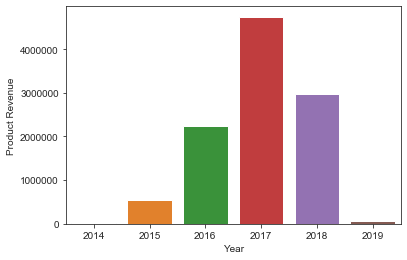

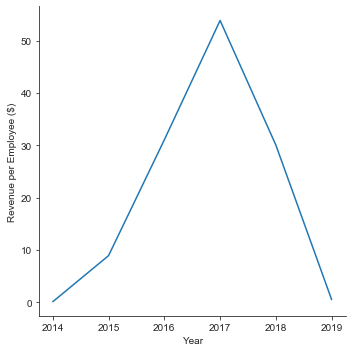

In [16]:
#set style of plot
#sns.set(style="whitegrid")
sns.set_style("ticks") 

#product revenue per year
ax = sns.barplot(x="Year", y="Product Revenue", data=df_year)

#revenue per employee per year
g = sns.relplot(x="Year", y="Revenue per Employee ($)", kind="line", data=df_year)


- revenue increases strongly from 2015 to 2017
- main driver are Nest products (see df.head(10) above)
- strong drop in 2018 but even more significantly decrease in 2019
- revenue per employee shows similar trend

**Check of number of unique purchases (=orders) and quantity (=number of products sold)**

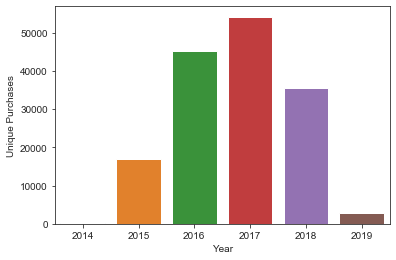

In [17]:
ax = sns.barplot(x="Year", y="Unique Purchases", data=df_year)

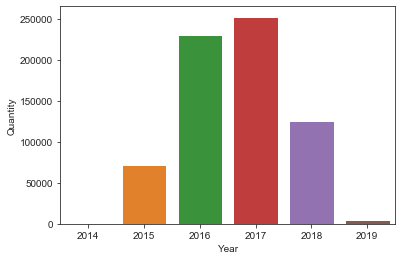

In [18]:
ax = sns.barplot(x="Year", y="Quantity", data=df_year)

- both graph show similar picture as for revenue but the differences in absolute numbers are not as huge as for revenue
- this is due to the fact that the average price for Nest products is much higher than the average price that simple merchandise products cost

--> therefore, we will exclude Nest products now from thsi analysis

### Exclude all Nest Products

In [19]:
df_ex_nest = df[~df["Product"].str.contains("Nest")]
df_ex_nest = df_ex_nest.reset_index(drop=True)
df_ex_nest.shape #show number of lines and columns after deleting Nest products

(3061, 10)

In [20]:
#show head without Nest products
df_ex_nest.head(10)

,Product,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,Leatherette Journal,2016,44852.35,404,4563,9.83,11.29,0.0,0.2771,0.0993
1,Google Metallic Notebook Set,2018,42597.25,437,8435,5.05,19.30,0.0,0.4515,0.1668
2,Google 22 oz Water Bottle,2017,39068.59,904,14261,2.74,15.78,0.0,0.8210,0.2470
3,Google Sunglasses,2017,35418.42,1513,11400,3.11,7.53,0.0,0.9958,0.3769
4,Google Thermal Bottle White,2018,35089.95,470,1725,20.34,3.67,0.0,0.3678,0.0699
5,Google Men's Zip Hoodie,2017,35082.66,356,694,50.55,1.95,0.0,0.2907,0.0649
6,Google Metallic Notebook Set,2017,33534.00,378,6480,5.18,17.14,0.0,0.3907,0.0967
7,26 oz Double Wall Insulated Bottle,2017,33074.34,408,1566,21.12,3.84,0.0,0.3624,0.0984
8,Eco-Aware Large Recycled Journal Combo,2016,32658.64,470,9322,3.50,19.83,0.0,0.3323,0.1166
9,Leatherette Journal,2017,32428.07,220,3733,8.69,16.97,0.0,0.3990,0.1852


- top sellers are now journals, notebooks, water bottles or sun glasses
- much lower avg. price now 

### Plotting values to visualize insights (excluding Nest products)

Show relation between quantity and avg. price

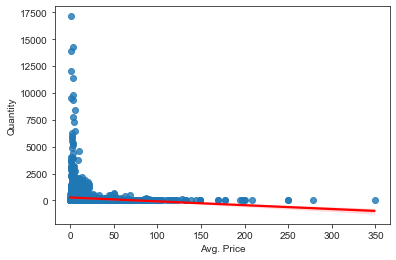

In [21]:
ax = sns.regplot(x="Avg. Price", y="Quantity", line_kws={"color":"r"}, data=df_ex_nest)

- majority of products still has a price <50USD
- quantity increases with lower avg. price even stronger than before (see regression line)
- high priced products are getting sold less than lower priced products

**Grouping numerical values by year**

In [22]:
df_year_ex_nest = df_ex_nest.groupby(['Year']).sum()
df_year_ex_nest = df_year_ex_nest.reset_index() #reset index to make Year a column again
df_year_ex_nest

,Year,Product Revenue,Unique Purchases,Quantity,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate
0,2014,7122.51,299,968,2651.82,446.88,0.0,5.5485,8.2253
1,2015,551726.19,16811,71301,9554.26,1418.91,0.0,67.6910,16.0940
2,2016,1499723.22,41129,224072,17949.64,2639.78,0.0,432.0678,107.6669
3,2017,1617934.50,37647,227836,8747.90,1947.26,0.0,446.6359,179.0618
4,2018,1015422.40,25707,110764,6379.34,787.17,0.0,101.0904,29.8117
5,2019,63334.49,2824,5168,7293.16,559.49,0.0,94.6823,58.9965
6,2020,8128.35,379,750,3424.59,256.05,0.0,39.4982,4.4700


- highest revenue in 2017, followed by 2016 and 2018
- huge drop of revenue in 2019 even with excluding Nest products
- numbers of 2014 very low as only data from October 2014 available

**Add number of employees of Alphabet (parent company of Google) to dataframe**

Taken from: 

https://www.statista.com/statistics/273744/number-of-full-time-google-employees/

In [23]:
#drop numbers of 2020 as the number of employees not yet available
df_year_ex_nest = df_year_ex_nest.drop([6])

#add number of employees per year
df_year_ex_nest.insert(4, "Employees", [53600, 61814, 72503, 88110, 98771, 118899], True)

In [24]:
#calculate revenue per employee for all years
df_year_ex_nest["Revenue per Employee ($)"] = df_year_ex_nest["Product Revenue"] / df_year_ex_nest["Employees"]
df_year_ex_nest

,Year,Product Revenue,Unique Purchases,Quantity,Employees,Avg. Price,Avg. QTY,Product Refund Amount,Cart-to-Detail Rate,Buy-to-Detail Rate,Revenue per Employee ($)
0,2014,7122.51,299,968,53600,2651.82,446.88,0.0,5.5485,8.2253,0.132883
1,2015,551726.19,16811,71301,61814,9554.26,1418.91,0.0,67.6910,16.0940,8.925586
2,2016,1499723.22,41129,224072,72503,17949.64,2639.78,0.0,432.0678,107.6669,20.684982
3,2017,1617934.50,37647,227836,88110,8747.90,1947.26,0.0,446.6359,179.0618,18.362666
4,2018,1015422.40,25707,110764,98771,6379.34,787.17,0.0,101.0904,29.8117,10.280572
5,2019,63334.49,2824,5168,118899,7293.16,559.49,0.0,94.6823,58.9965,0.532675


**Plot product revenue and revenue per employee per year**

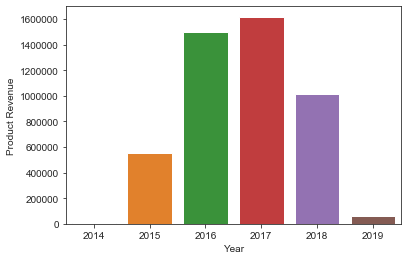

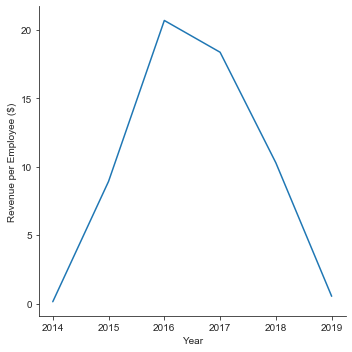

In [25]:
#set style of plot
#sns.set(style="whitegrid")
sns.set_style("ticks") 

#product revenue per year
ax = sns.barplot(x="Year", y="Product Revenue", data=df_year_ex_nest)

#revenue per employee per year
g = sns.relplot(x="Year", y="Revenue per Employee ($)", kind="line", data=df_year_ex_nest)

- similar picture also when excluding Nest products
- strongest year 2017, followed by 2016 and 2018 (total revenue)
- revenue per year from 2016-2018 closer together when excluding Nest products
- 2016 strongest year for revenue per employee
- since 2016 downward trend with regards to revenue generated per employee, sharp decrease from 2017 on


**Check of number of unique purchases (=orders) and quantity (=number of products sold)**

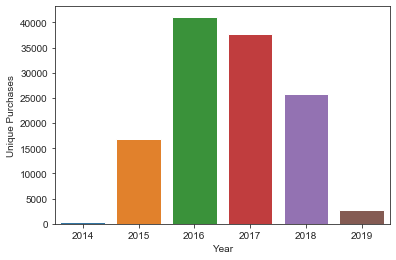

In [26]:
ax = sns.barplot(x="Year", y="Unique Purchases", data=df_year_ex_nest)

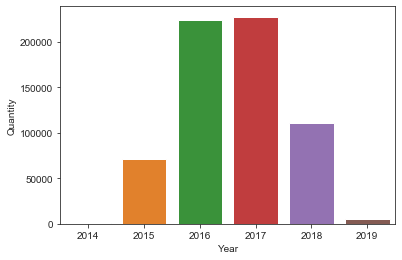

In [27]:
ax = sns.barplot(x="Year", y="Quantity", data=df_year_ex_nest)

- both graph show similar picture as for revenue but the differences in absolute numbers are not as huge as for revenue
- the number of products per order decreased from 2018 on --> smaller basket size

**Export *.csv to work with it in Tableau**

In [28]:
df_year_ex_nest.to_csv("revenue_year_employees_ex_nest.csv")

# Conclusions

**- hugh ramp up of employees in Google from 2014 on**

**- interest in Google store/brand identification is high**

**- decreasing interest in Google Merchandise Store since 2017**

**- revenue per Google employee also decreasing since 2017 and showing less intentions to buy --> implying less identification with Google brand**